In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import torch
from torch import nn
from functools import partial

/data/vision/phillipi/akumar01/miniconda3/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
from einops import rearrange

In [4]:
import gymnasium as gym
import gym as gym_old

/data/vision/phillipi/akumar01/miniconda3/lib/python3.10/site-packages/gymnasium/envs/registration.py:521: UserWarning: WARN: Overriding environment GymV26Environment-v0 already in registry.
  logger.warn(f"Overriding environment {new_spec.id} already in registry.")
/data/vision/phillipi/akumar01/miniconda3/lib/python3.10/site-packages/gymnasium/envs/registration.py:521: UserWarning: WARN: Overriding environment GymV22Environment-v0 already in registry.
  logger.warn(f"Overriding environment {new_spec.id} already in registry.")


In [5]:
from tqdm.auto import tqdm

In [6]:
import procgen

In [7]:
import cv2

In [8]:
from ppo import *

In [9]:
import os

In [10]:
from tqdm.auto import tqdm

In [109]:
def load_prev_data(args):
    x_train, y_train = [], []
    for level in tqdm(range(38)):
        exp_dir = f"data/{'procgen-miner-v0'}_{'int'}_{level}_0/"
        fs = np.array(os.listdir(exp_dir))
        fs = np.sort(fs)
        fs = fs[len(fs)//2:]
        fs = fs[np.random.permutation(len(fs))[:12]]
        for f in fs:
            obs = torch.load(f'{exp_dir}/{f}/obs.pt')
            actions = torch.load(f'{exp_dir}/{f}/actions.pt')
            # ext_val = torch.load(f'{exp_dir}/{f}/ext_val.pt')
            # int_val = torch.load(f'{exp_dir}/{f}/int_val.pt')
            x_train.append(obs)
            y_train.append(actions)
    x_train = torch.cat(x_train, dim=0)
    y_train = torch.cat(y_train, dim=0)
    return x_train, y_train
    
a, b = load_prev_data(None)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 38/38 [03:57<00:00,  6.24s/it]


In [114]:
a.numel()*a.element_size()/1e9

10.2961152

In [27]:
x_train.numel()*x_train.element_size()/1e9

104.6771712

In [112]:
env = make_env(10)
agent = Agent(env)

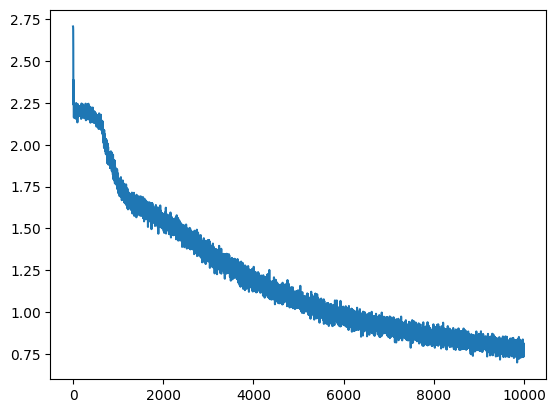

In [113]:
losses = []
bc.train_bc_agent(agent, x_train, y_train, 1028, 10000, 1e-3, 0.0, device='cuda:0', tqdm=tqdm,
                  callback_fn=lambda loss, **kwargs: losses.append(loss.item()))
plt.plot(losses)


In [47]:
x_train.shape

torch.Size([927200, 4, 84, 84])

In [67]:
a = x_train[100]

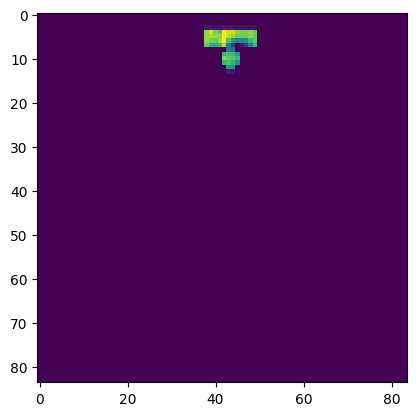

In [68]:
plt.imshow(a.std(dim=0).numpy())

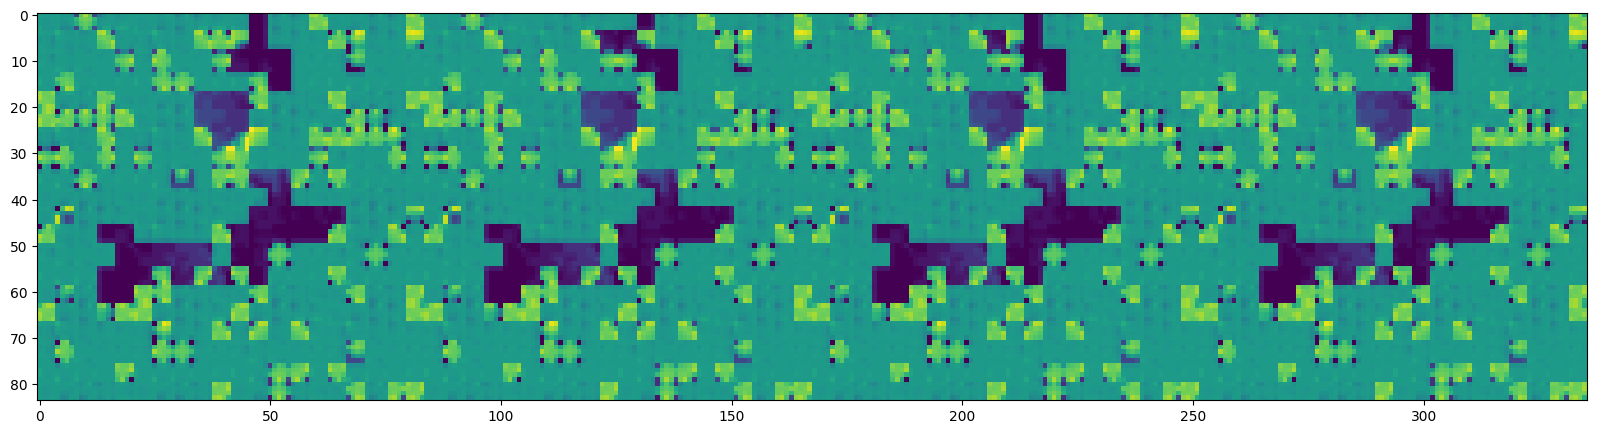

In [62]:
plt.figure(figsize=(20, 8))
plt.imshow(rearrange(x_train[100], 'c h w -> h (c w)').numpy())

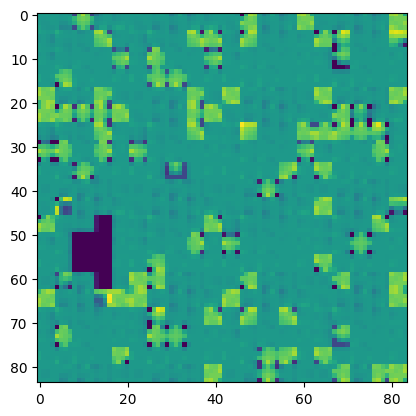

In [ ]:
plt.imshow(x_train[0, -1].numpy())

In [46]:
env.single_action_space

Discrete(15)

In [39]:
obs.shape

torch.Size([200, 4, 84, 84])

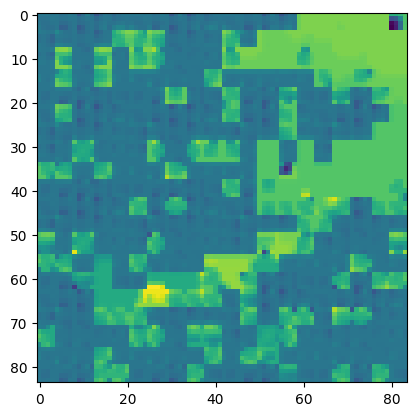

In [40]:
plt.imshow(obs[0, -1])

In [75]:
env = make_env(3, seed=3)

In [76]:
obs = env.reset()

In [77]:
a = rearrange(obs[:, -1], 'b h w -> h (b w)')

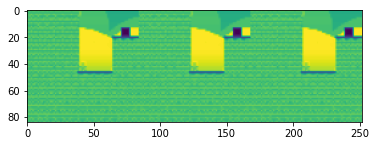

In [78]:
plt.imshow(a)

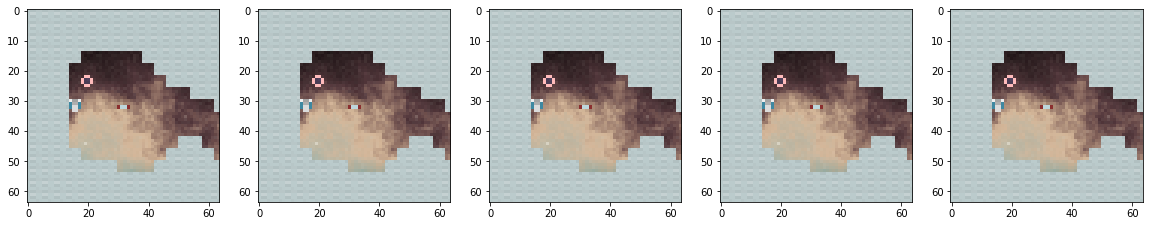

In [272]:
obs, info = env.reset()
plt.figure(figsize=(20, 5))
for i in range(len(obs)):
    plt.subplot(1, 5, i+1)
    plt.imshow(obs[i])
plt.show()

In [9]:
from ppo import make_env, make_single_env

In [12]:
env = make_env(10, level_id=0, video_folder='data/videos')
# env = make_env(10, level_id=0, video_folder=None)
obs, info = env.reset()
for i in tqdm(range(10000)):
    obs, rew, term, trunc, info = env.step(env.action_space.sample())

Moviepy - Building video /Users/akarshkumar0101/unipolicy/exploration_distillation/data/videos/rl-video-episode-0.mp4.
Moviepy - Writing video /Users/akarshkumar0101/unipolicy/exploration_distillation/data/videos/rl-video-episode-0.mp4



Moviepy - Done !
Moviepy - video ready /Users/akarshkumar0101/unipolicy/exploration_distillation/data/videos/rl-video-episode-0.mp4


 10%|▉         | 979/10000 [00:03<00:27, 329.20it/s]

Moviepy - Building video /Users/akarshkumar0101/unipolicy/exploration_distillation/data/videos/rl-video-episode-0.mp4.
Moviepy - Writing video /Users/akarshkumar0101/unipolicy/exploration_distillation/data/videos/rl-video-episode-0.mp4



 10%|█         | 1047/10000 [00:03<00:40, 219.13it/s]

Moviepy - Done !
Moviepy - video ready /Users/akarshkumar0101/unipolicy/exploration_distillation/data/videos/rl-video-episode-0.mp4


 20%|█▉        | 1973/10000 [00:06<00:21, 378.39it/s]

Moviepy - Building video /Users/akarshkumar0101/unipolicy/exploration_distillation/data/videos/rl-video-episode-1.mp4.
Moviepy - Writing video /Users/akarshkumar0101/unipolicy/exploration_distillation/data/videos/rl-video-episode-1.mp4



 20%|██        | 2045/10000 [00:06<00:33, 240.27it/s]

Moviepy - Done !
Moviepy - video ready /Users/akarshkumar0101/unipolicy/exploration_distillation/data/videos/rl-video-episode-1.mp4


 86%|████████▋ | 8629/10000 [00:23<00:04, 283.70it/s]

Moviepy - Building video /Users/akarshkumar0101/unipolicy/exploration_distillation/data/videos/rl-video-episode-8.mp4.
Moviepy - Writing video /Users/akarshkumar0101/unipolicy/exploration_distillation/data/videos/rl-video-episode-8.mp4



 87%|████████▋ | 8702/10000 [00:24<00:06, 208.19it/s]

Moviepy - Done !
Moviepy - video ready /Users/akarshkumar0101/unipolicy/exploration_distillation/data/videos/rl-video-episode-8.mp4


100%|██████████| 10000/10000 [00:27<00:00, 358.29it/s]


In [18]:
videos_uploaded

{'rl-video-episode-0.mp4', 'rl-video-episode-1.mp4', 'rl-video-episode-8.mp4'}

In [9]:
obs, reward, done, info = env.step(np.zeros(10))

In [10]:
done

array([False, False, False, False, False, False, False, False, False,
       False])

In [14]:
from ppo import layer_init

In [25]:

def layer_init(layer, std=np.sqrt(2), bias_const=0.0):
    torch.nn.init.orthogonal_(layer.weight, std)
    torch.nn.init.constant_(layer.bias, bias_const)
    return layer


class Agent(nn.Module):
    def __init__(self, envs):
        super().__init__()
        self.network = nn.Sequential(
            layer_init(nn.Conv2d(4, 32, 8, stride=4)),
            nn.ReLU(),
            layer_init(nn.Conv2d(32, 64, 4, stride=2)),
            nn.ReLU(),
            layer_init(nn.Conv2d(64, 64, 3, stride=1)),
            nn.ReLU(),
            nn.Flatten(),
            layer_init(nn.Linear(64 * 7 * 7, 256)),
            nn.ReLU(),
            layer_init(nn.Linear(256, 448)),
            nn.ReLU(),
        )
        self.extra_layer = nn.Sequential(layer_init(nn.Linear(448, 448), std=0.1), nn.ReLU())
        self.actor = nn.Sequential(
            layer_init(nn.Linear(448, 448), std=0.01),
            nn.ReLU(),
            layer_init(nn.Linear(448, envs.single_action_space.n), std=0.01),
        )
        self.critic_ext = layer_init(nn.Linear(448, 1), std=0.01)
        self.critic_int = layer_init(nn.Linear(448, 1), std=0.01)

    def get_dist_and_values(self, x, action=None):
        hidden = self.network(x / 255.0)
        logits = self.actor(hidden)
        probs = Categorical(logits=logits)
        features = self.extra_layer(hidden)
        return probs, self.critic_ext(features + hidden)[..., 0], self.critic_int(features + hidden)[..., 0]

class RNDModel(nn.Module):
    def __init__(self, input_size, output_size):
        super().__init__()

        self.input_size = input_size
        self.output_size = output_size

        feature_output = 7 * 7 * 64

        # Prediction network
        self.predictor = nn.Sequential(
            layer_init(nn.Conv2d(in_channels=1, out_channels=32, kernel_size=8, stride=4)),
            nn.LeakyReLU(),
            layer_init(nn.Conv2d(in_channels=32, out_channels=64, kernel_size=4, stride=2)),
            nn.LeakyReLU(),
            layer_init(nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3, stride=1)),
            nn.LeakyReLU(),
            nn.Flatten(),
            layer_init(nn.Linear(feature_output, 512)),
            nn.ReLU(),
            layer_init(nn.Linear(512, 512)),
            nn.ReLU(),
            layer_init(nn.Linear(512, 512)),
        )

        # Target network
        self.target = nn.Sequential(
            layer_init(nn.Conv2d(in_channels=1, out_channels=32, kernel_size=8, stride=4)),
            nn.LeakyReLU(),
            layer_init(nn.Conv2d(in_channels=32, out_channels=64, kernel_size=4, stride=2)),
            nn.LeakyReLU(),
            layer_init(nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3, stride=1)),
            nn.LeakyReLU(),
            nn.Flatten(),
            layer_init(nn.Linear(feature_output, 512)),
        )

        # target network is not trainable
        for param in self.target.parameters():
            param.requires_grad = False

    def forward(self, next_obs):
        target_feature = self.target(next_obs)
        predict_feature = self.predictor(next_obs)

        return predict_feature, target_feature

In [42]:
import my_rnd_ppo

In [43]:
env = make_env(10)
agent = Agent(env)
rnd_model = RNDModel(None, None)
my_rnd_ppo.run_rndppo(env, agent, rnd_model, lr=1e-3, tqdm=tqdm)

Start to initialize observation normalization parameter.....


100%|██████████| 256/256 [00:03<00:00, 75.13it/s] 


End to initialize...


  0%|          | 22/12500 [03:53<36:49:17, 10.62s/it, avg_rew_ext=0.0234, avg_rew_int=0.0197] 


KeyboardInterrupt: 

In [61]:
env = make_env(20, 'procgen-caveflyer-v0', seed=30)

In [62]:
obs, info = env.reset()
for i in range(50):
    obs, _, _, _, info = env.step(env.action_space.sample())

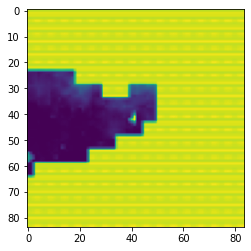

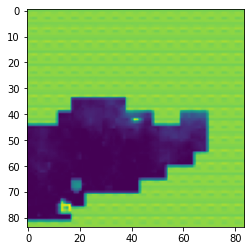

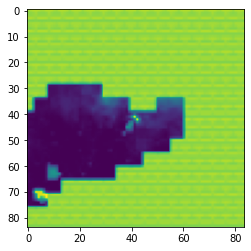

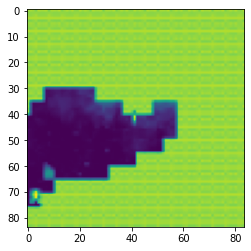

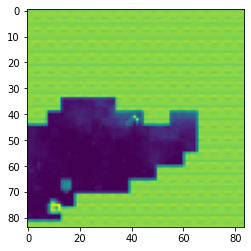

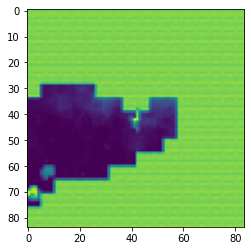

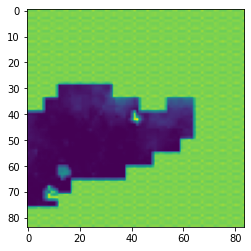

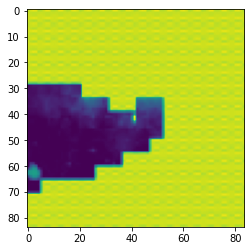

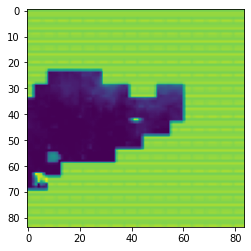

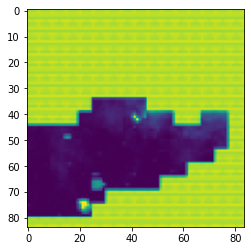

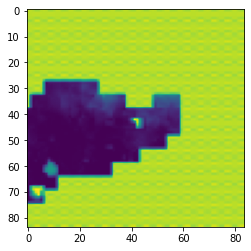

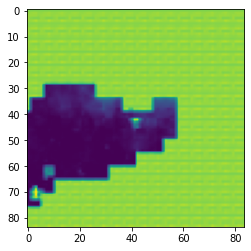

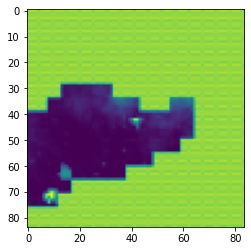

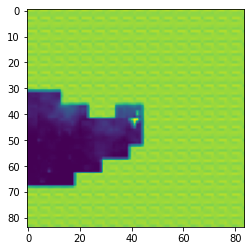

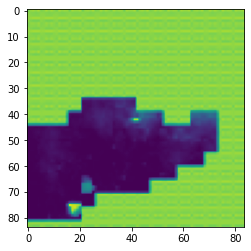

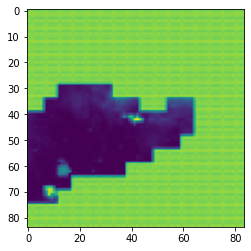

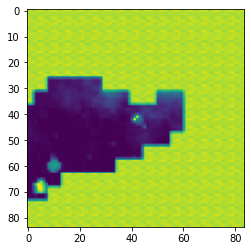

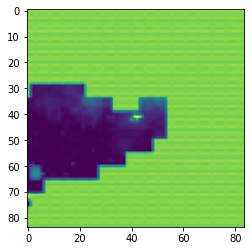

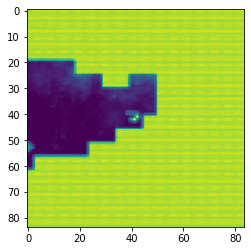

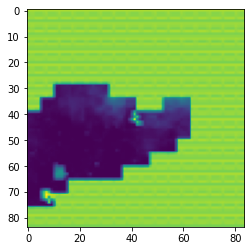

In [63]:
for o in obs[:, -1]:
    plt.imshow(o)
    plt.show()